STEP #1: LIBRARIES IMPORT


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
# Disable all warnings
warnings.filterwarnings('ignore')


STEP #2: IMPORT DATASET


In [17]:
IceCream = pd.read_csv("./IceCreamData.csv")
IceCream.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [18]:
IceCream.isnull().sum()

Temperature    0
Revenue        0
dtype: int64

In [19]:
IceCream.describe()


,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


In [20]:
IceCream.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


STEP#3: CREATE TESTING AND TRAINING DATASET

In [21]:
y = IceCream['Revenue']


In [22]:
X = IceCream[['Temperature']]


In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)



STEP#4: TRAIN THE MODEL

In [24]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression(fit_intercept = True)
regressor.fit(X_train,y_train)


LinearRegression()

In [25]:
print('Linear Model Coefficient (m)', regressor.coef_)
print('Linear Model Coefficient (b)', regressor.intercept_)

Linear Model Coefficient (m) [21.39612393]
Linear Model Coefficient (b) 44.96211961883154


STEP#5: TEST THE MODEL


In [26]:
y_predict = regressor.predict( X_test)
# y_predict

In [27]:
y_test

234    474.832244
451    537.664801
18     649.561175
376    798.059718
94     337.119025
          ...    
348    856.303304
38     740.935685
441    459.735350
303    550.441272
231    449.112869
Name: Revenue, Length: 125, dtype: float64

STEP#6: MODEL EVALUATION


In [28]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# Evaluate the model's performance
mse = mean_squared_error(y_test, y_predict)
mae = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')

Mean Squared Error: 515.26
R-squared: 0.98
Mean Absolute Error: 18.12


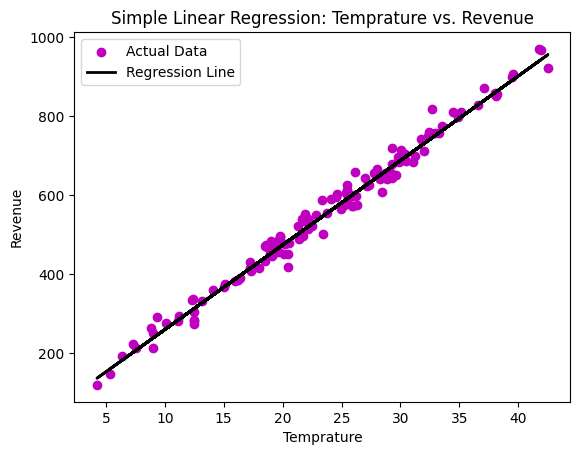

In [41]:
# Plot the regression line and data points
plt.scatter(X_test, y_test, color='m', label='Actual Data')
plt.plot(X_test, y_predict, color='black', label='Regression Line', linewidth=2)
plt.xlabel('Temprature')
plt.ylabel('Revenue')
plt.legend()
plt.title('Simple Linear Regression: Temprature vs. Revenue')
plt.show()

In [32]:
# Predict revenue for a temperature
def Predict(temperature_array): 
    temperature_array = [[temperature_array]]
    predicted_revenue = regressor.predict(temperature_array)
    # print(predicted_revenue[0])
    return predicted_revenue

In [34]:
output = Predict(47)
output

1050.5799444250156
